In [3]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image

<b><span style="color:white; background-color:red; font-size:150%">마크다운</span></b>

<b><span style="color:black; background-color:yellow; font-size:200%">게임 Battle Ground의 pc, 모바일, steam 별  
    인기순위를 분석하는 모형</span></b>


# BATTLEGROUNDS 란?

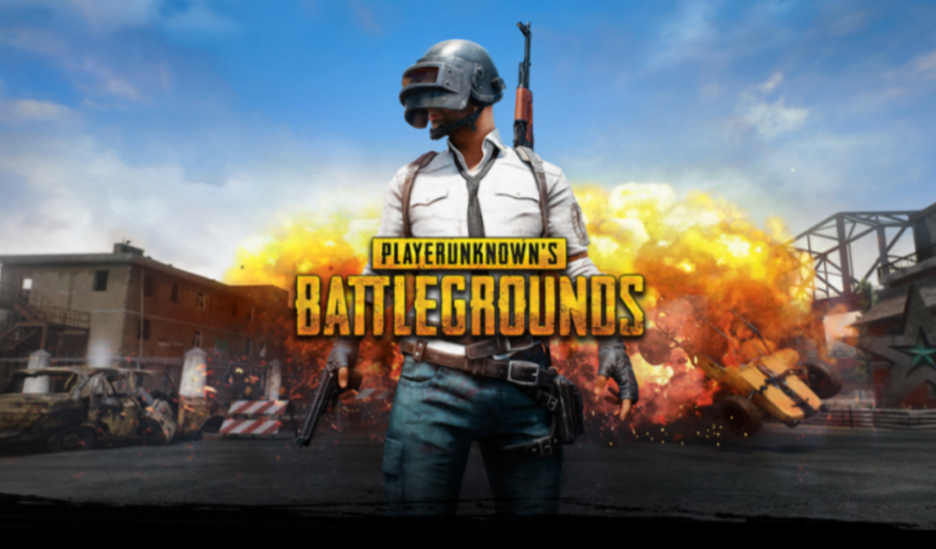

## BATTLEGROUNDS 기본 지식
인기  
장르  
유통사

## 분석 동기 및 이유

BATTLEGROUNDS는 우리가 찾을 수 있는 데이터 플랫폼에 모두 있는 게임이기 때문에 **상관관계**를 분석하기에 좋은 모델이라고 판단했다.  
그리고 팀원 중 BATTLEGROUNDS 게임 유저가 있었기 때문에 관련 배경지식을 쉽게 이해할 수 있었다.

# BATTLEGROUNDS data 수집 - DF 보여주기

data 수집방법 - 크롤링  
사유: 정리되어져 있는 파일이 없었기 때문에, 특정 사이트들에서 가져올 수 밖에 없었음

크롤링을 통해서만 데이터를 수집하기로 결정.  
훗날 후회하는 계기가 됨...

*크롤링 으로 csv 파일로 저장함  
크롤링방법  
1. Instant Data Scraper  
2. 셀레니움, 파이썬  
겨우 찾아낸거임 ㅡㅡ 뭐라고 하기만 해라 가만안둠.. 상처받음..

##  y축
국민트리 : https://trees.gamemeca.com/
- 사이트 소개 : 
- 기준 선정 이유 : pc, 모바일, 스팀의 인기순위가 모두 있기 때문에 선정함
- 신용/신뢰 : 

국민트리_df.tail()_예시
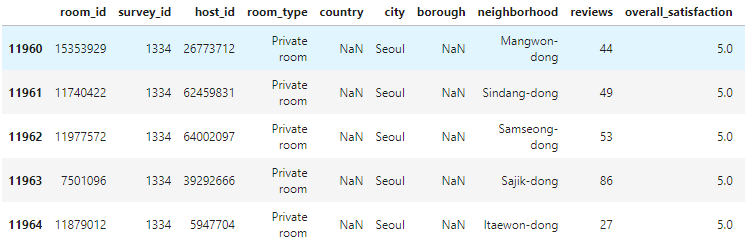

국민트리_df_항목_예시
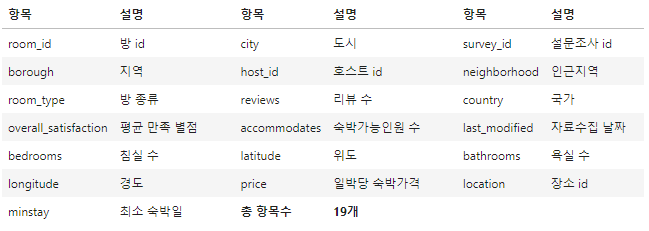

국민트리_df_사용 가능한 데이터_예시
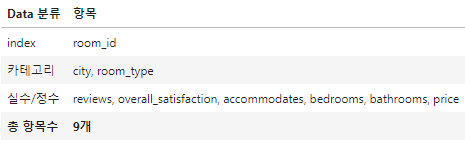

## x축

### pc방 인기순위, 점유율 (가입하면 무료)
the log : https://www.thelog.co.kr/index.do
- 사이트 소개 : 
- 신용/신뢰 : 네이버에서 게임순위를 검색했을 때 출처가 되는 사이트이기 때문에 신뢰도 확보

In [7]:
# pc방_df.tail() 

In [8]:
# pc방 점유율_df_항목 

In [9]:
# pc방 점유율_df_사용 가능한 데이터 

### 모바일 인기순위, 수익, 유저 (일정기간까지 무료로 볼 수 있음)
mobileindex : https://www.mobileindex.com/mi-chart/weekly-rank/revenue #수익
              https://www.mobileindex.com/mi-chart/weekly-rank/user #유저
- 사이트 소개 : 
- 신용/신뢰? 구글, 삼성전자, 네이버, 쿠팡 등 대기업이 금액을 지불하여 data를 가져온 것으로 보아 신뢰도 확보

In [19]:
# 모바일_df.tail()

In [20]:
# 모바일_df_항목

In [21]:
# 모바일_df_사용 가능한 데이터

### 아프리카 인기순위, 방송 점유율 (일정기간까지 무료로 볼 수 있음)
아프리카 : https://gameranking.afreecatv.com/
- 사이트 소개 : 
- 신용/신뢰? 

In [22]:
# 아프리카_df.tail()

In [23]:
# 아프리카_df_항목

In [24]:
# 아프리카_df_사용 가능한 데이터

# 데이터 전처리

크롤링한 데이터의 경우에는 데이터 전처리가 필요

'항목'에 따른 데이터 처리_예시
- 항목 : week_num ... 
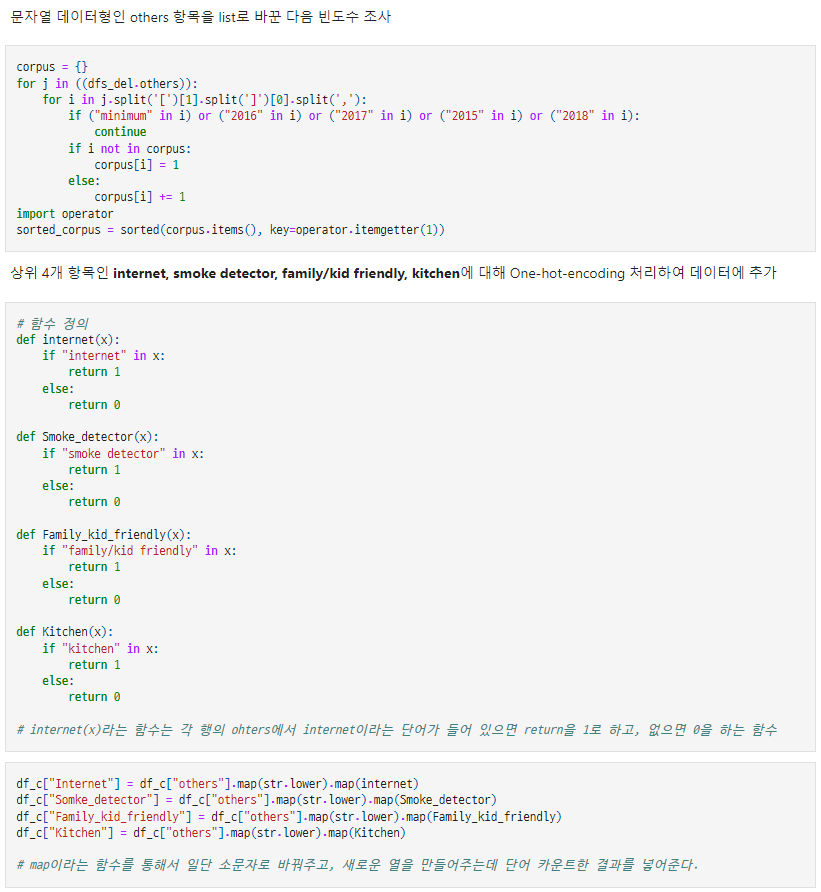

분석에 사용한 데이터 설명_예시
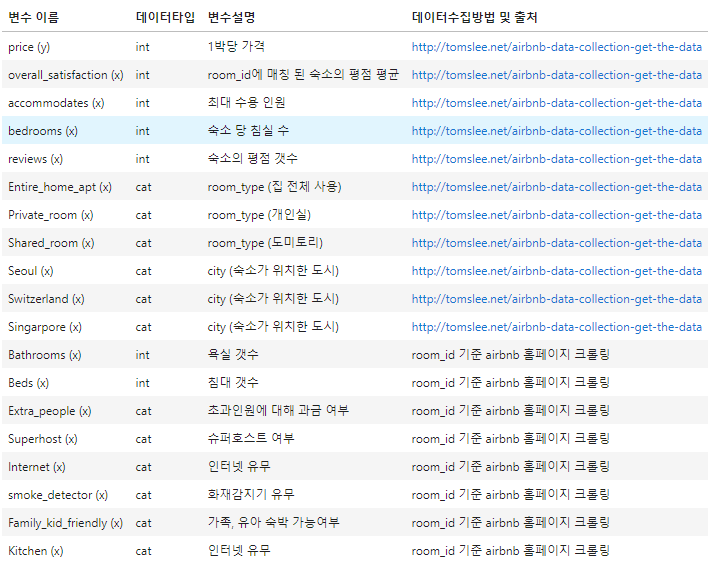

# BATTLEGROUNDS 데이터 분석

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import time
import warnings
warnings.filterwarnings(action='ignore')
from IPython.display import Image

## BATTLEGROUNDS  DataFrame 가져오기 -> GRAPH 보여줌=시각화

In [12]:
#github에 모두 push 한 후 가져오기

# 기준data
#game popularity ranking
dfpop_p = pd.read_csv('파일경로') #pc 인기순위
dfpop_m = pd.read_csv('파일경로') #모바일 인기순위
dfpop_s = pd.read_csv('파일경로') #스팀 인기순위
                                              # 스팀
                                              # - 비교변수를 찾지 못함 
                                              # - 하지만 BATTLEGROUNDS 게임이 'steam' 에도 있기 때문에 종속변수들 사이에서도 영향이 있을 것으로 추정되어 데이터를 가져오게 되었음


# 변수data
#pc_room 
dfpc = pd.read_csv('파일경로') #pc 방

#모바일
dfr = pd.read_csv('파일경로') #모바일 수익
dfu = pd.read_csv('파일경로') #모바일 유저

#아프리카tv: 인터넷방송 (pc, 모바일 같이 있는 data, 하지만 거의 pc가 점유율이 높음)
dfa = pd.read_csv('파일경로') 

FileNotFoundError: [Errno 2] No such file or directory: '파일경로'

## DataFrame  
1.비교,  
2.모형(회귀, 잔차의 분포, 다중공선성,..),  
3.y=fx(할수있다면..ㅋ)
- 각 데이터를 합쳐서 사용하지 않고 각 플랫폼(pc,모바일,steam)으로 나누어 비교함
- 기준 vs 기준
- 기준 vs 변수
- 변수 vs 변수

### 기준 vs 기준

#### pc 인기순위 vs 스팀 인기순위

#### pc 인기순위 vs 모바일 인기순위

#### 모바일 인기순위 vs 스팀 인기순위

### 기준 vs 변수

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : pc 인기순위</span></b>

#### pc 인기순위 vs pc 방

#### pc 인기순위 vs 모바일 수익

#### pc 인기순위 vs 모바일 유저

#### pc 인기순위 vs 아프리카tv

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : 모바일 인기순위</span></b>

#### 모바일 인기순위 vs pc 방

#### 모바일 인기순위 vs 모바일 수익

#### 모바일 인기순위 vs 모바일 유저

#### 모바일 인기순위 vs 아프리카tv

<b><span style="color:black; background-color:aliceblue; font-size:120%">기준 : 스팀 인기순위</span></b>

#### 스팀 인기순위 vs pc 방

#### 스팀 인기순위 vs 모바일 수익

#### 스팀 인기순위 vs 모바일 유저

#### 스팀 인기순위 vs 아프리카tv

### 변수 vs 변수

#### pc 방 vs 모바일 수익

#### pc 방 vs 모바일 유저

#### pc 방 vs 아프리카tv

#### 모바일 수익 vs 모바일 유저

#### 모바일 수익 vs 아프리카tv

#### 모바일 유저 vs 아프리카tv

# 모형 Test

## 상관관계 공식 구하기_예시
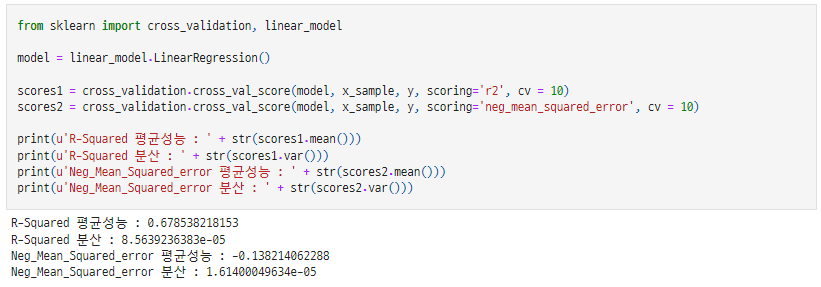

## 최종모형_예시
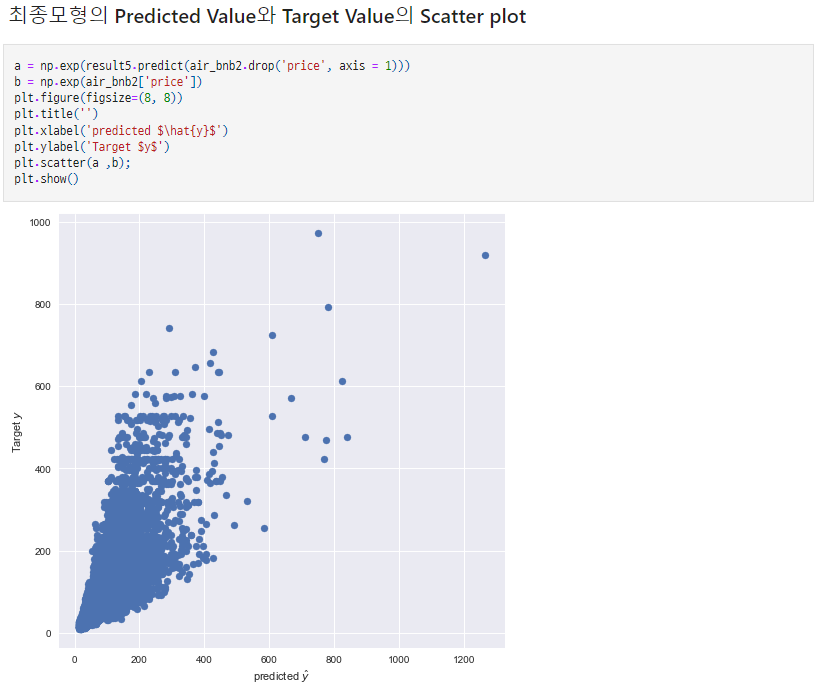

# 결론

## 결과_예시
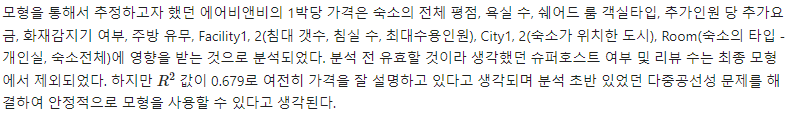

## 최종모형_예시
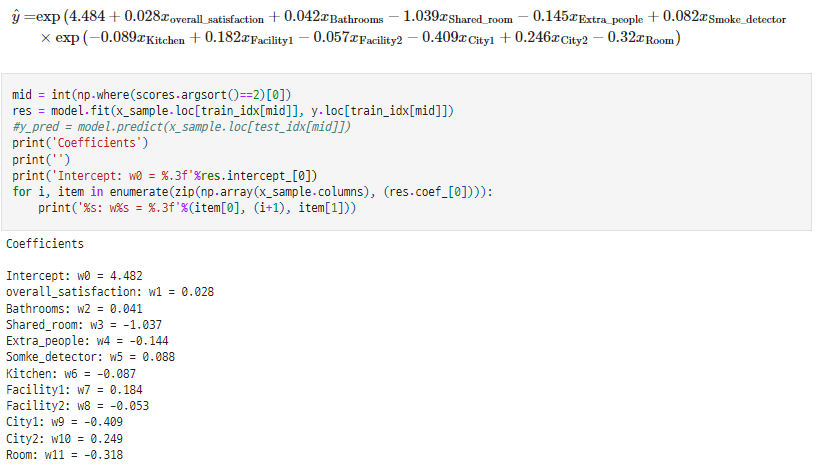

## 코멘트_예시
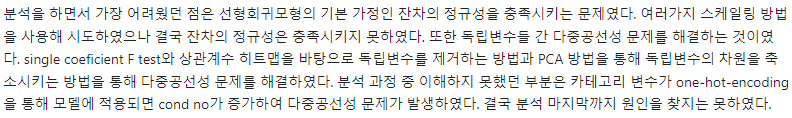